# Project: Swing Trading Methods

In [1]:
# project dependencies
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from collections import Counter
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
# Definition of the query below: 
# URL >> https://query1.finance.yahoo.com/v8/finance/chart/{$symbol}?range={$range}&interval={$interval}
# symbol >> the stock ticker symbol, e.g. AAPL for Apple
# range >> the desired range of the query, allowed parameters are [1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max]
# interval >> the desired interval of the quote, e.g. every 5 minutes, allowed parameters are [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
# https://finance.yahoo.com/quote/AAPL/history?period1=1592006400&period2=1592438400&interval=1d&filter=history&frequency=1d

base_url= "https://query1.finance.yahoo.com/v8/finance/chart/"
def createUrl(symb, rng, interval):
    return base_url+symb+'?'+"range="+rng+"&interval="+interval


### Creating first test case by initiating the first dataframe

In [3]:
endpoint=createUrl("aapl", "6mo", "1d")
req = requests.get(endpoint)
rawJson = req.json()

indicators= list(rawJson["chart"]["result"][0]) #indicators 
raw_data=rawJson['chart']['result'][0][indicators[2]]['quote'][0] #this is the values we are looking for 
column_name=list(raw_data.keys()) #collumn names we need 

#coverting the epoch time
def covnertTime(val):
    x = datetime.fromtimestamp(val)    
    return x
timestamps = list(map(lambda val: covnertTime(val), rawJson["chart"]["result"][0]["timestamp"]))
column_name.insert(0,"timestamp")

df = pd.DataFrame(columns=column_name)  #dataframe 
df[column_name[0]] = timestamps
df[column_name[1]] = raw_data['close']
df[column_name[2]] = raw_data['high']
df[column_name[3]] = raw_data['open']
df[column_name[4]] = raw_data['volume']
df[column_name[5]] = raw_data['low']

df

,timestamp,volume,low,high,open,close
0,2019-12-23 09:30:00,284.000000,284.250000,280.529999,24643000,280.369995
1,2019-12-24 09:30:00,284.269989,284.890015,284.690002,12119700,282.920013
2,2019-12-26 09:30:00,289.910004,289.980011,284.820007,23280300,284.700012
3,2019-12-27 09:30:00,289.799988,293.970001,291.119995,36566500,288.119995
4,2019-12-30 09:30:00,291.519989,292.690002,289.459991,36028600,285.220001
...,...,...,...,...,...,...
121,2020-06-17 09:30:00,351.589996,355.399994,355.149994,28532000,351.089996
122,2020-06-18 09:30:00,351.730011,353.450012,351.410004,24205100,349.220001
123,2020-06-19 09:30:00,349.720001,356.559998,354.640015,66119000,345.149994
124,2020-06-22 09:30:00,358.869995,359.459991,351.339996,33719700,351.149994


### ploting the values to the graph 

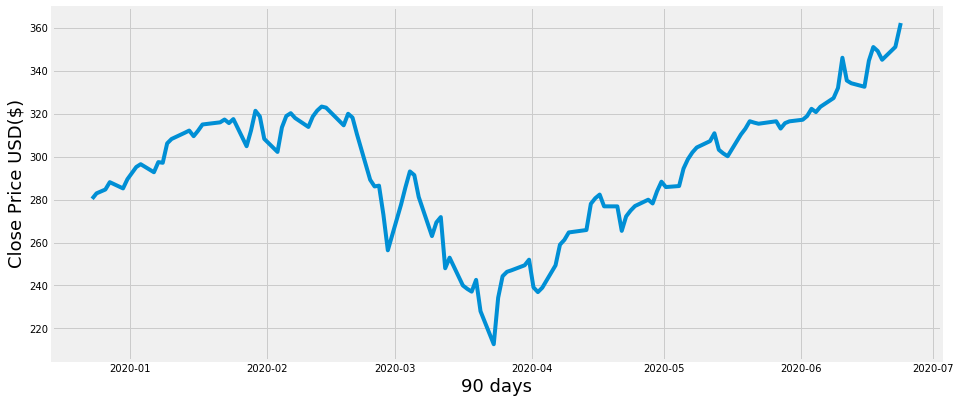

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


plt.figure(figsize=(14.2, 6.5))
plt.plot(df.timestamp, df.close, label="Close Price")
plt.xlabel("90 days", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.show()

In [5]:
# Preparing the data for calculating the RSI

# first we need to get the delta in price from the previous day
delta = df.close.diff(1).dropna()
delta

#second we need to get positive and negative gains

up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0


# getting the time period
period = 14

# Calcuate the average gains and losses
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())



In [6]:
# calculate the relative strenght
rs = avg_gain/avg_loss

# calculating the relative strength index 

rsi = 100.0 - (100.0/ (1.0 + rs))


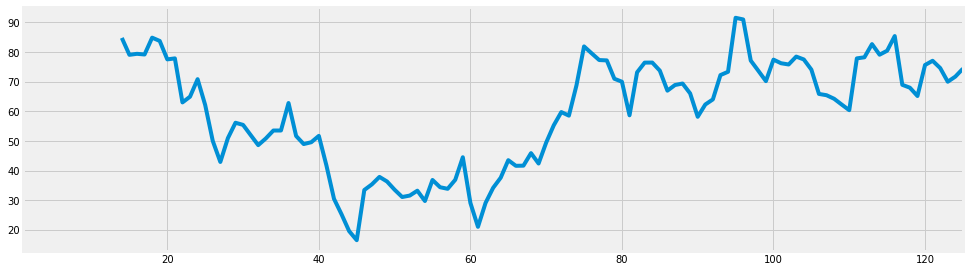

In [7]:
# plotting the RSI

plt.figure(figsize=(15, 4.5))
rsi.plot()
plt.show()

In [8]:
newdf = pd.DataFrame()
newdf["close"] = df["close"]
newdf["RSI"] = rsi

newdf

,close,RSI
0,280.369995,NaN
1,282.920013,NaN
2,284.700012,NaN
3,288.119995,NaN
4,285.220001,NaN
...,...,...
121,351.089996,77.060438
122,349.220001,74.605564
123,345.149994,69.991414
124,351.149994,71.723301


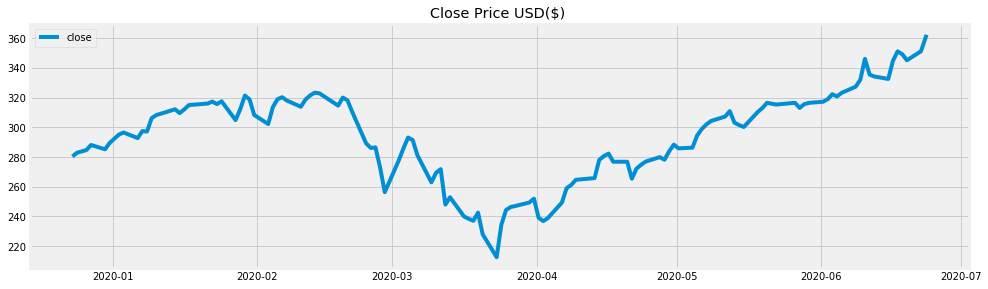

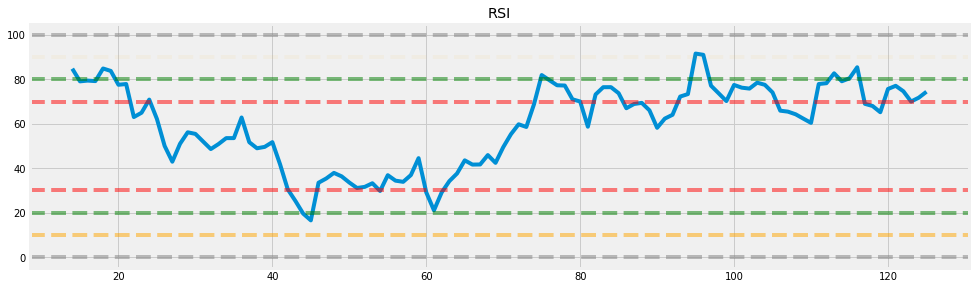

In [9]:
plt.figure(figsize=(15, 4.5))
plt.plot(df.timestamp, newdf["close"])
plt.title("Close Price USD($) ")
plt.legend(newdf.columns.values, loc="upper left")
plt.show()

# corresponding RSI values and significant levels
plt.figure(figsize=(15, 4.5))
plt.title("RSI")
plt.plot(newdf.index, newdf["RSI"])
plt.axhline(0, linestyle="--", alpha=0.5, color="gray")
plt.axhline(10, linestyle="--", alpha=0.5, color="orange")
plt.axhline(20, linestyle="--", alpha=0.5, color="green")
plt.axhline(30, linestyle="--", alpha=0.5, color="red")
plt.axhline(70, linestyle="--", alpha=0.5, color="red")
plt.axhline(80, linestyle="--", alpha=0.5, color="green")
plt.axhline(90, linestyle="--", alpha=.05, color="orange")
plt.axhline(100, linestyle="--", alpha=0.5, color="gray")
plt.show()